In [6]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.signal
import sys
%matplotlib inline

In [3]:
# reading image
image = mpimg.imread('images64/f0_b64.png')

In [4]:
COLOR_CHANNELS = len(np.shape(image))
COLOR_CHANNELS

3

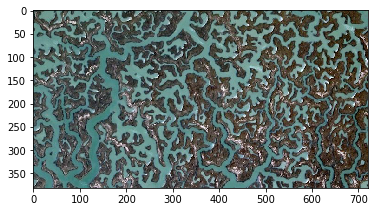

In [9]:
plt.imshow(image)

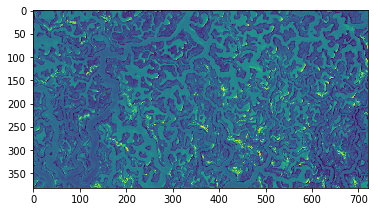

In [136]:
def imageToGray(im):
    R, G, B = im[:,:,0], im[:,:,1], im[:,:,2]
    return 0.2989*R + 0.5870*G + 0.1140*B 

In [117]:
def gaussian_scale_mask(shape=(3,3), sigma=0.5):
    """
    Gaussian mask Generation Function
    """
    m, n = [(ss-1.)/2. for ss in shape]
    y_pix, x_pix = np.ogrid[-m:m+1, -n:n+1]
    h_g_mask = np.exp(-(x_pix*x_pix + y_pix*y_pix) / (2*sigma*sigma))
    h_g_mask[ h_g_mask < np.finfo(h_g_mask.dtype).eps*h_g_mask.max() ] = 0
    sum_h_g_mask = h_g_mask.sum()

    if sum_h_g_mask!=0:
        h_g_mask /= sum_h_g_mask
    return h_g_mask

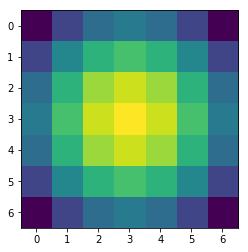

In [118]:
r = 7
plt.imshow(gaussian_scale_mask((r,r), r/2.0))

In [ ]:
scipy.signal.convolve2d(
)

In [124]:
image.shape

(382, 721, 3)

D:\anaconda\envs\new\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


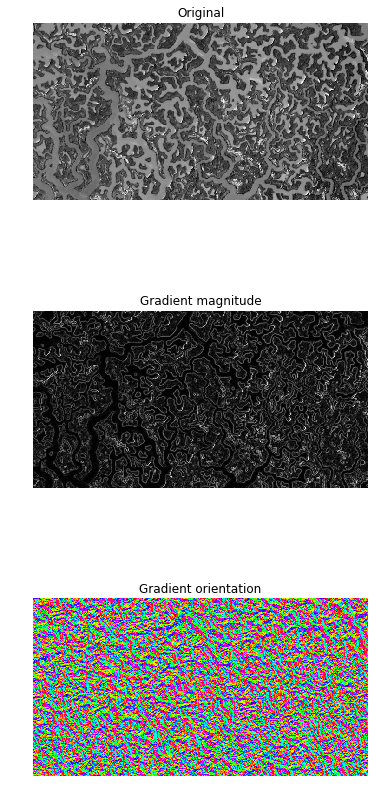

In [137]:
>>> from scipy import signal
>>> from scipy import misc
>>> ascent = imageToGray(image)#misc.ascent()
>>> scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
...                    [-10+0j, 0+ 0j, +10 +0j],
...                    [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
>>> grad = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')

>>> import matplotlib.pyplot as plt
>>> fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(6, 15))
>>> ax_orig.imshow(ascent, cmap='gray')
>>> ax_orig.set_title('Original')
>>> ax_orig.set_axis_off()
>>> ax_mag.imshow(np.absolute(grad), cmap='gray')
>>> ax_mag.set_title('Gradient magnitude')
>>> ax_mag.set_axis_off()
>>> ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
>>> ax_ang.set_title('Gradient orientation')
>>> ax_ang.set_axis_off()
>>> fig.show()